# Exercise 9 (Online DB): Single-Subject DrugBias Snapshot

**Learning Goals:**
- You will select one subject, generate the DrugBias bar chart, and interpret Amygdala vs Hippocampus cue-reactivity.
- You will use your output to write Post 1 and compare with classmates in Post 2.
- No code should be pasted into Canvas.

*Note: This notebook is streamlined for DrugBias analysis only. All cohort-level, hypothesis testing, and structural MRI content has been removed.*

## Subject Selection

Enter subject in this format: sub-001, sub-042, sub-120.

In [45]:
# --- Subject Selection ---
import re
SUBJECT = "sub-001"
if not re.fullmatch(r"sub-\d{3}", SUBJECT):
    raise ValueError("Subject ID must look like sub-001.")


## Load Subject-Level Data

This notebook uses two files:
- `exercises/E09_qreactivity/data/e9_qreact_behavior_min.csv` (for craving group)
- `exercises/E09_qreactivity/data/e9_task_qreact_roi_betas.csv` (for DrugBias values)

No large tables will be displayed.

In [ ]:
# --- Load Data ---
import pandas as pd
df_betas = pd.read_csv('data/e9_task_qreact_roi_betas.csv')
df_behav = pd.read_csv('data/e9_qreact_behavior_min.csv')


## Compute DrugBias Values and Craving Group

Extract Amygdala and Hippocampus DrugBias (Drug − Neutral) and craving group for the selected subject.

In [47]:

# --- Standardize Columns ---
betas_df = betas_df.rename(columns={"participant_id": "subject", "ROI": "roi", "condition": "condition", "beta": "DrugBias"})
for col in ["subject", "roi", "condition"]:
    if col in betas_df.columns:
        betas_df[col] = betas_df[col].astype(str).str.strip()
betas_df["roi_lower"] = betas_df["roi"].str.lower()
craving_df = craving_df.rename(columns={"participant_id": "subject"})

# --- Extract DrugBias Values ---
amyg_row = betas_df[(betas_df['subject'] == SUBJECT) & (betas_df['roi_lower'] == 'amygdala')]
hipp_row = betas_df[(betas_df['subject'] == SUBJECT) & (betas_df['roi_lower'] == 'hippocampus')]
if amyg_row.empty or hipp_row.empty:
    raise ValueError(f"DrugBias values not found for {SUBJECT}.")
Amyg_DrugBias = amyg_row['DrugBias'].values[0]
Hipp_DrugBias = hipp_row['DrugBias'].values[0]

# --- Extract Craving Group ---
craving_row = craving_df[craving_df['subject'] == SUBJECT]
craving_group = craving_row['craving_group'].values[0] if not craving_row.empty and 'craving_group' in craving_row.columns else None


## Plot DrugBias by ROI

Bar chart: DrugBias (Drug − Neutral) by ROI (Amygdala, Hippocampus).

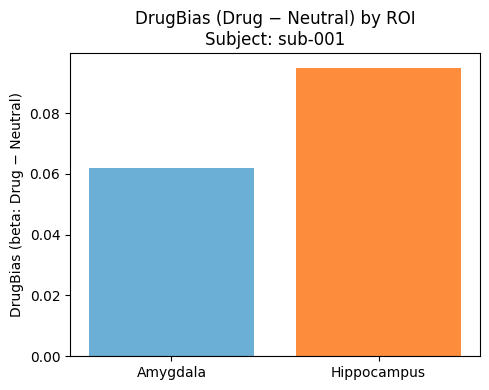

In [48]:

import matplotlib.pyplot as plt
rois = ['Amygdala', 'Hippocampus']
drugbias = [Amyg_DrugBias, Hipp_DrugBias]
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(rois, drugbias, color=['#6baed6', '#fd8d3c'])
ax.set_ylabel('DrugBias (beta: Drug − Neutral)')
ax.set_title(f'DrugBias (Drug − Neutral) by ROI\nSubject: {SUBJECT}')
ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.tight_layout()
fig_filename = f'fig_E9_{SUBJECT}_drugbias.png'
plt.savefig(fig_filename, dpi=120)
plt.show()

## DrugBias Values and Craving Group

Below are your DrugBias values and craving group for Post 1.

In [49]:
print(f"Amyg_DrugBias: {Amyg_DrugBias:.3f}")
print(f"Hipp_DrugBias: {Hipp_DrugBias:.3f}")
if craving_group:
    print(f"Craving group: {craving_group}")
else:
    print("Craving group: (not available in this dataset)")

Amyg_DrugBias: 0.062
Hipp_DrugBias: 0.095
Craving group: High


## Copy/Paste for Canvas (Post 1)

Copy the block below into your Canvas Post 1.

In [50]:
# --- Output Block ---
craving_text = craving_group if craving_group else "(not available in this dataset)"
post1_block = f"""Subject ID: {SUBJECT}
Craving group: {craving_text}
Amyg_DrugBias: {Amyg_DrugBias:.3f}
Hipp_DrugBias: {Hipp_DrugBias:.3f}

Interpretation note: Single-subject neural signals are noisy and not diagnostic. Use cautious language.
"""
print(post1_block)

Subject ID: sub-001
Craving group: High
Amyg_DrugBias: 0.062
Hipp_DrugBias: 0.095

Interpretation note: Single-subject neural signals are noisy and not diagnostic. Use cautious language.

